In [1]:
from autumn.tools.project import get_project
from matplotlib import pyplot
from autumn.tools.plots.utils import REF_DATE
# from autumn.tools.calibration.targets import get_target_series
import pandas as pd
# from autumn.tools.utils.display import pretty_print

In [2]:
project = get_project("hierarchical_sir", "multi")

In [3]:
model = project.run_baseline_model(project.param_set.baseline)
derived_df = model.get_derived_outputs_df()

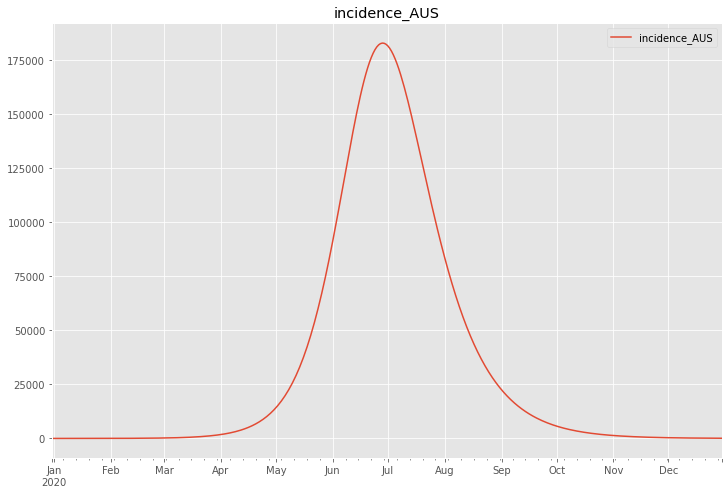

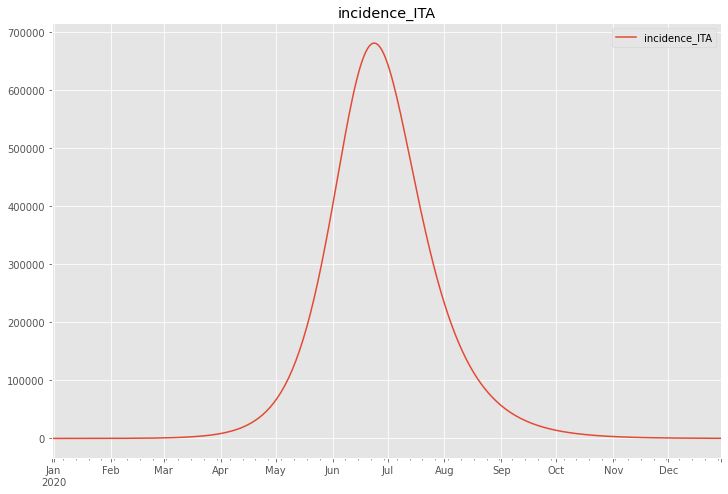

In [4]:
for output_type in ["incidence_AUS", "incidence_ITA"]:
    outputs = [o for o in derived_df.columns if o.startswith(output_type)]
    
    fig = pyplot.figure(figsize=(12, 8))
    pyplot.style.use("ggplot")
    axis = fig.add_subplot()
    for output in outputs:
        axis = derived_df[output].plot()
    axis.set_title(output_type)
    # axis.set_xlim(("Jan 2020", "May 2020"))
    axis.legend()
    